I'm using the final version of the Data--Frame throughout. To get it you can simply run Labeled_Data.py which lives in the data folder. 

In [1]:
import pandas as pd

# Go up one level, then into Data/
df = pd.read_csv('Data/amazon_merged.csv')

# Check it's loaded
print(df.shape)
df.head()


/var/folders/zz/p68469x91nz101jr8rs456_80000gq/T/ipykernel_18428/3376278333.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/amazon_merged.csv')


(633883, 21)


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,match,incident_indices
0,"['Toys & Games', 'Puzzles', 'Jigsaw Puzzles']",NaN,"[""Three Dr. Suess' Puzzles: Green Eggs and Ham...",NaN,Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,[],NaN,Dr. Seuss,"['Three giant floor puzzles', 'Includes: Dr. S...","['>#2,230,717 in Toys & Games (See Top 100 in ...",...,Toys & Games,NaN,NaN,NaN,0000191639,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,0,[]
1,[],NaN,['<b>Prepare to be Afraid!</b><br /><br />The ...,NaN,Pathfinder: Book of Beasts - Legendary Foes,[],NaN,Pathfinder Roleplaying Jon Brazer Productions,[],"['>#2,294,535 in Toys & Games (See Top 100 in ...",...,Toys & Games,NaN,NaN,.a-box-inner{background-color:#fff}#alohaBuyBo...,0004950763,[],[],NaN,0,[]
2,[],NaN,[],NaN,Nursery Rhymes Felt Book,[],NaN,Betty Lukens,[],"['>#2,871,983 in Toys & Games (See Top 100 in ...",...,Toys & Games,NaN,NaN,.a-box-inner{background-color:#fff}#alohaBuyBo...,0005069491,[],[],NaN,0,[]
3,"['Toys & Games', 'Games', 'Card Games']",NaN,['Blitz Vintage Card Game'],NaN,Dutch Blitz Card Game,['B00WIIPQEC'],NaN,Dutch Blitz Games Co,[],"['>#376,337 in Toys & Games (See Top 100 in To...",...,Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$24.95,0004983289,[],[],NaN,0,[]
4,[],NaN,"['Marvel SuperHeroes themed ""magic ink"" colori...",NaN,Magic Pen Painting (Marvel Super Heroes),"['B009SB7TI8', 'B009SB8Z1I']",NaN,Lee Publications,[],"['>#934,954 in Toys & Games (See Top 100 in To...",...,Toys & Games,NaN,NaN,$4.92,0006466222,[],[],NaN,0,[]


In [10]:
import pandas as pd

# Assume df is already defined and has 'asin' and 'matches'
# Step 1: Count how many unique match values per asin
nunique_per_asin = df.groupby('asin')['match'].nunique()

# Step 2: Get list of asins with more than one unique match value
conflicting_asins = nunique_per_asin[nunique_per_asin > 1].index.tolist()

# Step 3: Filter your dataframe to only those conflicting asins
conflicting_rows = df[df['asin'].isin(conflicting_asins)].sort_values('asin')

# Step 4: Display result
print(f"⚠️ Found {len(conflicting_asins)} ASINs with both 0 and 1 in 'matches'.")
conflicting_rows.head()


⚠️ Found 0 ASINs with both 0 and 1 in 'matches'.


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,match,incident_indices


The asins have not been dropped but they are consistently labeled. 

We now investigate the category feature, in particular we want to figure out if we can replace our dataset with a smaller one by removing some unnecessary categories. 

In [14]:
# Step 1: Group by category and filter to those where all matches == 0
groups = df.groupby('category')
only_zeros = groups.filter(lambda g: (g['match'] == 0).all())

# Step 2: Count number of listings per such category
counts = only_zeros['category'].value_counts()

# Step 3: Build result list
result = sorted(list(counts.items()), key=lambda x: x[1])  # ascending by count

# Step 4: Stats
num_categories = len(result)
total_listings = sum(counts)

# Step 5: Display
print(f"📊 Number of categories with only match == 0: {num_categories}")
print(f"📦 Total Amazon listings in these categories: {total_listings}")
print("\n🔝 Top 10 categories with only 0's (by listing count):")
for category, count in result[-10:][::-1]:  # top 10 descending
    print(f"{category}: {count}")


📊 Number of categories with only match == 0: 5137
📦 Total Amazon listings in these categories: 181397

🔝 Top 10 categories with only 0's (by listing count):
['Toys & Games', 'Games', 'Trading Card Games', 'Single Cards']: 20279
['Toys & Games', 'Hobbies', 'Remote & App Controlled Vehicles & Parts', 'Remote & App Controlled Vehicle Parts']: 8948
['Toys & Games', 'Games', 'Card Games']: 5602
['Toys & Games', 'Games', 'Trading Card Games', 'Decks & Sets']: 5365
['Toys & Games', 'Party Supplies', 'Balloons']: 4953
['Toys & Games', 'Action Figures & Statues', 'Statues & Bobbleheads', 'Statues']: 3858
['Toys & Games', 'Hobbies', 'Coin Collecting']: 3589
['Toys & Games', 'Hobbies', 'Models & Model Kits', 'Model Kits', 'Figure Kits']: 3214
['Toys & Games', 'Games', 'Standard Playing Card Decks']: 2959
['Toys & Games', 'Hobbies', 'Models & Model Kits', 'Pre-Built & Diecast Models', 'Vehicles']: 2736


In [2]:
# Step 1: Group by category and filter those with at least one match == 1
groups = df.groupby('category')
has_one_match = groups.filter(lambda g: (g['match'] == 1).any())

# Step 2: Count number of listings per such category
counts_match_1 = has_one_match['category'].value_counts()

# Step 3: Build result list sorted descending by count
result_match_1 = sorted(list(counts_match_1.items()), key=lambda x: x[1], reverse=True)

# Step 4: Stats
num_categories_match_1 = len(result_match_1)
total_listings_match_1 = sum(counts_match_1)

# Step 5: Display
print(f"✅ Number of categories with at least one match == 1: {num_categories_match_1}")
print(f"📦 Total Amazon listings in these categories: {total_listings_match_1}")
print("\n🔝 Top 10 categories with at least one match == 1 (by listing count):")
for category, count in result_match_1[:10]:
    print(f"{category}: {count}")


✅ Number of categories with at least one match == 1: 163
📦 Total Amazon listings in these categories: 452486

🔝 Top 10 categories with at least one match == 1 (by listing count):
[]: 62243
['Toys & Games', 'Action Figures & Statues', 'Action Figures']: 51543
['Toys & Games', 'Stuffed Animals & Plush Toys', 'Stuffed Animals & Teddy Bears']: 29762
['Toys & Games', 'Dolls & Accessories', 'Dolls']: 22295
['Toys & Games', 'Puzzles', 'Jigsaw Puzzles']: 19265
['Toys & Games', 'Games', 'Board Games']: 15715
['Toys & Games', 'Toy Remote Control & Play Vehicles', 'Die-Cast Vehicles']: 12648
['Toys & Games', 'Building Toys', 'Building Sets']: 12284
['Toys & Games', 'Action Figures & Statues', 'Accessories']: 10377
['Toys & Games', 'Stuffed Animals & Plush Toys', 'Plush Puppets']: 9775


In [17]:
num_all_categories = df['category'].nunique()
print(f"📊 Total number of unique categories: {num_all_categories}")


📊 Total number of unique categories: 5300


In [3]:
# Step 1: Extract categories that had at least one match == 1
categories_with_match_1 = [category for category, count in result_match_1]

# Step 2: Filter the original DataFrame to keep only those rows
smaller_df = df[df['category'].isin(categories_with_match_1)].copy()

# Step 3: Confirm
print(f"✅ smaller_df created with {len(smaller_df)} rows across {smaller_df['category'].nunique()} categories.")


✅ smaller_df created with 452486 rows across 163 categories.


In [19]:
# Count how many listings per category
category_counts = smaller_df['category'].value_counts()

# Find max and min
max_listings = category_counts.max()
min_listings = category_counts.min()

# Find which categories those are
category_with_max = category_counts.idxmax()
category_with_min = category_counts.idxmin()

# Display
print(f"🔝 Max listings in a single category: {max_listings} (Category: '{category_with_max}')")
print(f"🔻 Min listings in a single category: {min_listings} (Category: '{category_with_min}')")


🔝 Max listings in a single category: 62243 (Category: '[]')
🔻 Min listings in a single category: 1 (Category: '['Toys & Games', 'Stuffed Animals & Plush Toys', 'Plush Figures', 'Soft Flush', 'Disney Frozen Princess Elsa 16" H Plush Doll']')


In [21]:
# Group by category
grouped = smaller_df.groupby('category')

# 1️⃣ Count categories with only one listing
category_sizes = grouped.size()
num_single_listing_categories = (category_sizes == 1).sum()
print(f"📦 Number of categories with only ONE listing: {num_single_listing_categories}")

# 2️⃣ Count categories where all listings have match == 1
only_ones = grouped['match'].apply(lambda x: (x == 1).all())
num_all_match_1 = only_ones.sum()
print(f"✅ Number of categories where all listings have match == 1: {num_all_match_1}")


📦 Number of categories with only ONE listing: 1
✅ Number of categories where all listings have match == 1: 1


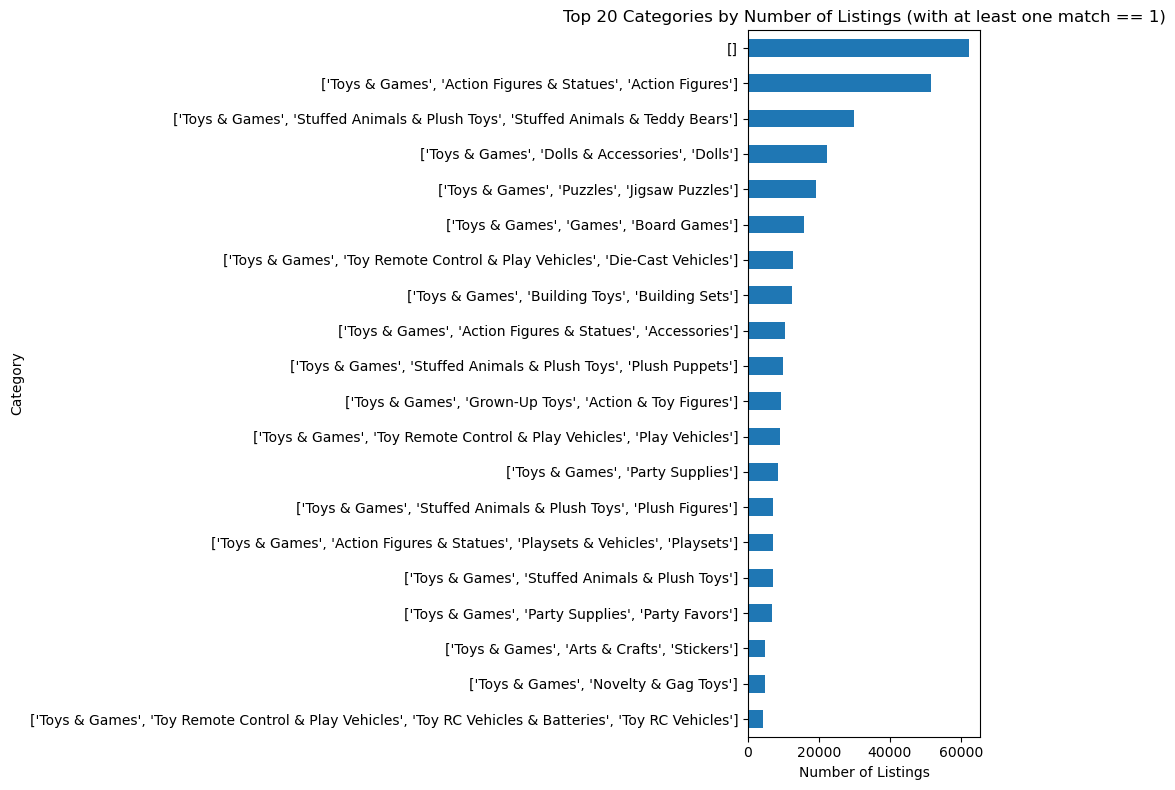

In [22]:
import matplotlib.pyplot as plt

# Step 1: Count listings per category
category_counts = smaller_df['category'].value_counts().head(20)

# Step 2: Plot
plt.figure(figsize=(10, 8))
category_counts.sort_values().plot(kind='barh')  # horizontal bar chart
plt.title('Top 20 Categories by Number of Listings (with at least one match == 1)')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


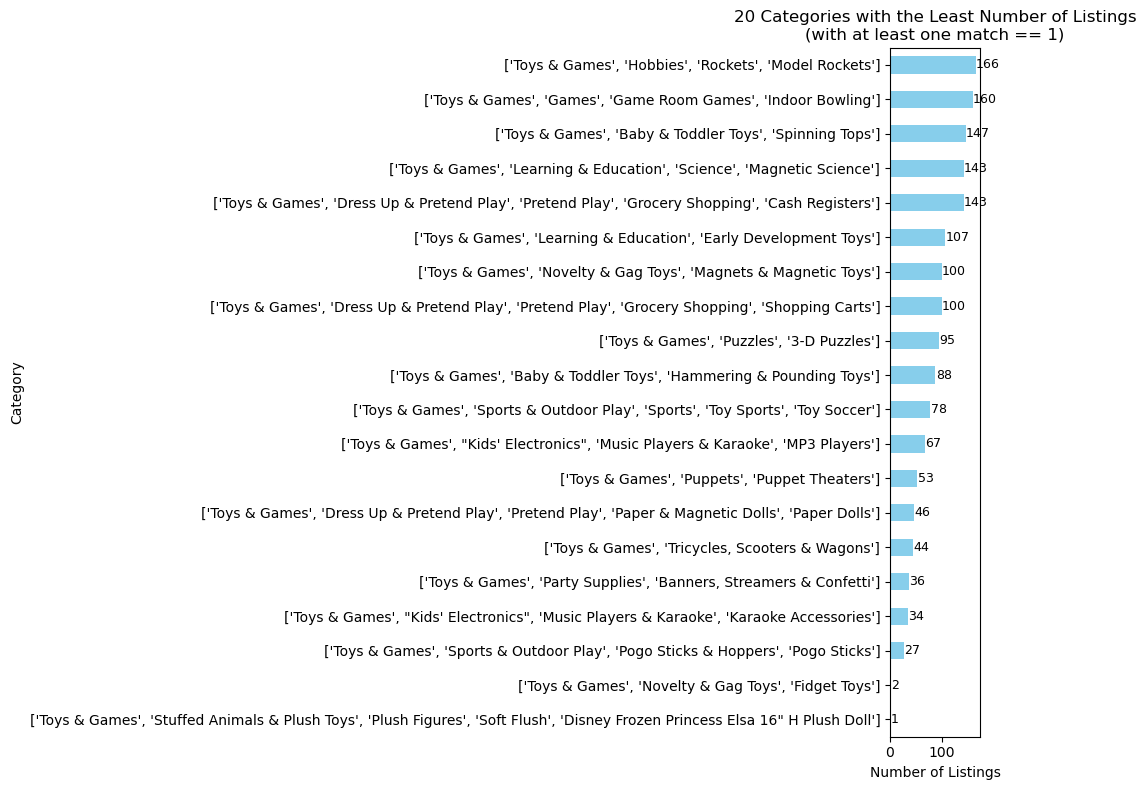

In [25]:
import matplotlib.pyplot as plt

# Step 1: Count listings per category (20 categories with the fewest listings)
category_counts = smaller_df['category'].value_counts().tail(20)
category_counts = category_counts.sort_values()  # Ensure smallest on top

# Step 2: Plot
plt.figure(figsize=(10, 8))
ax = category_counts.plot(kind='barh', color='skyblue')
plt.title('20 Categories with the Least Number of Listings\n(with at least one match == 1)')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.tight_layout()

# Step 3: Add value labels on the bars
for i, (value, name) in enumerate(zip(category_counts.values, category_counts.index)):
    ax.text(value + 0.5, i, str(value), va='center', fontsize=9)

plt.show()


I suggest we drop the only 0 categories and work with smaller_df. Below I consider the description category and I use NLP to extract some new features. Below you see "certification" feature. 

In [27]:
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 47.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [transformers] [transformers]ub]


In [29]:
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 55.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torch]32m3/4 [torch]kx]


In [4]:
from transformers import pipeline
from tqdm import tqdm

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Optional: checks if GPU is available


2.7.1
False


In [6]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use mps:0


In [7]:
text = "FDA certified and ISO approved non-toxic product."
labels = ["certified", "non-toxic", "hypoallergenic", "safe to use"]

result = classifier(text, labels, multi_label=True)
print(result)


{'sequence': 'FDA certified and ISO approved non-toxic product.', 'labels': ['safe to use', 'non-toxic', 'certified', 'hypoallergenic'], 'scores': [0.9976987838745117, 0.9969680905342102, 0.9933708310127258, 0.6317756175994873]}


In [9]:
max_certified_score = max(result['scores'])  # Or result['scores'][result['labels'].index('certified')]
print(f"Max score for 'certified': {max_certified_score:.4f}")  

Max score for 'certified': 0.9977


In [85]:
certification_labels = [
    "FDA approved",
    "ISO certified",
    "CE marking",
    "third-party tested",
    "lab tested",
    "clinically tested",
    "hypoallergenic",
    "non-toxic",
    "PVC free",
    "BPA free",
    "phthalate free",
    "GMP certified",
    "UL certified",
    "organic certified"
]


In [93]:
def get_all_certifications_with_score(text, labels=certification_labels, threshold=0.98):
    """
    Returns (labels_above_threshold, max_score) from zero-shot classification.
    If no label passes threshold or text is empty, returns (None, max_score).
    """
    if not text or not text.strip() or text.strip() == '[]':
        return (None, 0.0)

    result = classifier(text, labels, multi_label=True)
    high_conf_labels = [
        label for label, score in zip(result['labels'], result['scores']) if score > threshold
    ]
    max_score = max(result['scores']) if result['scores'] else 0.0

    return (high_conf_labels if high_conf_labels else None, max_score)


In [94]:
text_1 = "FDA and CE certified product."
text_2 = "Gentle soap for everyday use."
text_3 = ""

print(get_all_certifications(text_1))  # ✅ should return some labels
print(get_all_certifications(text_2))  # ❌ should return None (scores < 0.95)
print(get_all_certifications(text_3))  # ❌ should return None (empty)


['clinically tested', 'CE marking', 'FDA approved']
['non-toxic']
None


In [95]:
sample_df = smaller_df.sample(n=300, random_state=42).copy()

from tqdm import tqdm
tqdm.pandas()

results = sample_df['description'].progress_apply(get_all_certifications_with_score)
sample_df['certification_labels'], sample_df['max_cert_score'] = zip(*results)



100%|██████████| 300/300 [01:26<00:00,  3.46it/s]


In [96]:
certified_df = sample_df[sample_df['certification_labels'].notna()]


In [97]:
# Show first 5 certified entries
certified_df[['description', 'certification_labels', 'max_cert_score']].head(10)


,description,certification_labels,max_cert_score
250612,"['- Designed in Austria, Made in Morocco. - Made of latex. - Hand painted with latex paint. - Baby safe and safe for all ages. - Squeaks. - Approximately 3.5"" long x 3"" wide x 3"" high.']",[non-toxic],0.992714
501573,"['Set of 5 colorful bath squirters. Squeeze gently and they will squirt water! Great for bathtub fun and laughs. Approx. size 3-4"". Tested safe for all ages, no BPA or phthalates, non-toxic, no bad plastic smells. Cute characters include whale, starfish, fish, jellyfish,clam or scallop and lobster. Great for your own children or as an inexpensive unique unisex toddler or baby shower gift.']","[non-toxic, lab tested, BPA free, phthalate free, clinically tested, third-party tested, FDA approved, UL certified]",0.999622
85904,"['We must work together as leaders of the six nations of the world to solve internal affairs without creating conflicts within our own borders. As the game progresses, hot spots could develop - and by games end several or all of the nations could be at war. The game is then lost. Each nation needs a balanced territory so that a balanced world results where population does not exceed land and resources and work is available for everyone. On the religious, cultural and political side, all sectors are also in balance with no particular sector dominating another. The key to achieving this balance is ""Right Education"" in which intelligence and compassion are nurtured. How well the players use Right Education and deploy the other factors within their borders while making trades to assist each other across borders will determine the degree of success in establishing firm and lasting peace in our time. An excellent game for group play. Includes: 6 nation charts, 2 sets of cards (110 total) consisting of population, land/resources, work/technology, religion/culture, politics/military and right education, die, and rules.', 'Our customers say: ""After 30 minutes of wheeling and dealing, making compromises, settling hot points, we felt as if we had lived through the perils and joys of international meetings. All in the good cause of making peace."" - Workshop Participant', '<b>Play as friends, not as enemies!</b> Family Pastimes games foster the spirit of cooperation. Players help each other climb a mountain, make a community, complete a space exploration... They never play against each other.', 'At <b>Family Pastimes</b> we believe that people of different ages and abilities should be able to play side by side, each making their best contribution. We are all there when we finish the game to take joy in our successes and wonder how we might work together even better the next time we play. We hope you enjoy playing and learning together!']",[third-party tested],0.990369
633049,['This sand sieve is great for kids to search for treasures in the fine or coarse sand! Easy to grab handles! PVC Free.'],"[PVC free, non-toxic]",0.997282
293132,"[""Oxybul: Learning through Playing. Our goal is to help parents stimulate their childrens development and self-confidence building, through thoroughly researched toys designed with the help of parents and childhood experts. \n\nThis beautiful African doll is very soft to cuddle and will quickly become baby's best friends.She offers an opportunity to open up to the world and to discover others, together with her two friends: the European Doll and the Asian Doll.""]",[lab tested],0.985567
45460,"['Extra large, soft, playful, true-to-life vinyl replicas of some of the most amazing creatures in the world. Excellent learning tool to introduce young children to our delicate and often endangered inhabitants of our planet. A fun way to spark the innate curiosity of a child. Each replica is finely hand painted and accurate down to the last detail. Educational information in five languages is included with each replica.', ""All our products are phthalate-free and thoroughly safety tested to safeguard your child's health. 

In [98]:
# Total number of rows in the sample
total = len(sample_df)

# Count of rows where certification_labels is not None
with_certification = sample_df['certification_labels'].notna().sum()

# Percentage
percentage = (with_certification / total) * 100

print(f"{with_certification} out of {total} listings got at least one certification label.")
print(f"That's {percentage:.2f}% of the listings.")


7 out of 300 listings got at least one certification label.
That's 2.33% of the listings.
